# Exercise 7

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [101]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [102]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [103]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [104]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [105]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [106]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [107]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [108]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

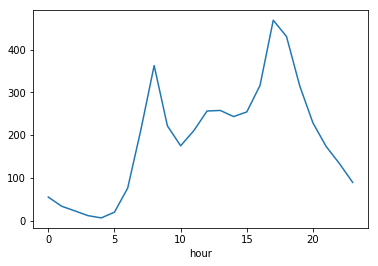

In [109]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

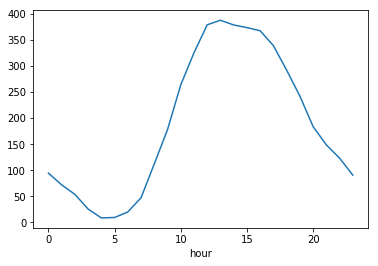

In [110]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

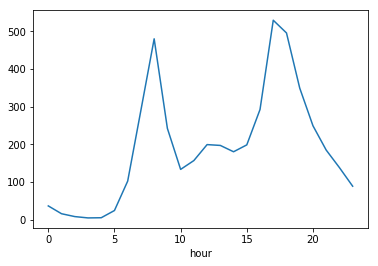

In [111]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

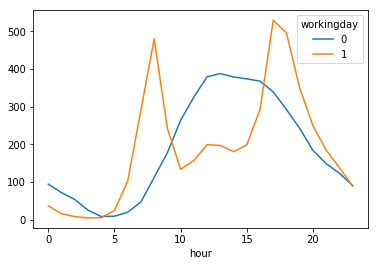

In [112]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [113]:
bikes_y = bikes['total']
bikes_x = bikes[['workingday','hour']]

from sklearn import datasets,linear_model
lr_multiple = linear_model.LinearRegression()
lr_multiple.fit(bikes_x, bikes_y)
y_pred_multiple = lr_multiple.predict(bikes_x)
print(lr_multiple.coef_)
print('cuando es 1 workingday aumenta en 4.07 total ')
print('cuando a medida que pasa una hora amenta en 10.49 total ')
print(lr_multiple.score(bikes_x,bikes_y))
print('Dado que los tipos de datos son categoricos y ordinaley, su comportamiento no es lineal la regresion no optimo para usar')

[ 4.07248627 10.49206282]
cuando es 1 workingday aumenta en 4.07 total 
cuando a medida que pasa una hora amenta en 10.49 total 
0.16059115011434866
Dado que los tipos de datos son categoricos y ordinaley, su comportamiento no es lineal la regresion no optimo para usar


# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [114]:
train_izq = bikes.loc[bikes.hour<24].copy()
train_izq.hour.unique()

def error_hora(train, hour):
    train['pred'] = train.loc[train.hour<hour, 'total'].mean()
    train.loc[train.hour>=hour, 'pred'] = train.loc[train.hour>=hour, 'total'].mean()
    print ((((train['total'] - train['pred'])**2).mean()) ** 0.5)

for hour in train_izq.hour.unique():
    print('hour ',hour)
    error_hora(train_izq, hour)
print('')
print('La mejor division es la hora 7 optimizando al menor error cuadratico medio')

hour  0
181.13613357426559
hour  1
178.88076030483188
hour  2
175.61266024769844
hour  3
171.5350162975495
hour  4
166.57596568309665
hour  5
160.50832916137819
hour  6
154.10979930228774
hour  7
150.22560060405686
hour  8
153.86972728404965
hour  9
163.39221989024873
hour  10
165.25615391972227
hour  11
165.00286510437286
hour  12
165.84659205524616
hour  13
168.04756019190663
hour  14
169.94604099621912
hour  15
171.14521362143498
hour  16
172.47403631919644
hour  17
175.2235068708682
hour  18
179.8668827954335
hour  19
181.12705316323988
hour  20
180.44126246625746
hour  21
179.7297936918192
hour  22
179.51222338944388
hour  23
179.87454650980683

La mejor division es la hora 7 optimizando al menor error cuadratico medio


In [115]:
train_izq = bikes.loc[bikes.hour<7].copy()
train_izq.hour.unique()

def error_hora(train, hour):
    train['pred'] = train.loc[train.hour<hour, 'total'].mean()
    train.loc[train.hour>=hour, 'pred'] = train.loc[train.hour>=hour, 'total'].mean()
    print ((((train['total'] - train['pred'])**2).mean()) ** 0.5)

for hour in train_izq.hour.unique():
    print('hour ',hour)
    error_hora(train_izq, hour)
print('')   
print('La mejor division es la hora 6 optimizando al menor error cuadratico medio')

hour  0
39.56714516247788
hour  1
38.46175887834954
hour  2
38.827302356307555
hour  3
39.34538405588436
hour  4
39.534113157382144
hour  5
38.30948200125475
hour  6
35.24426946227024

La mejor division es la hora 6 optimizando al menor error cuadratico medio


In [116]:
train_izq = bikes.loc[bikes.hour<6].copy()
train_izq.hour.unique()

def error_hora(train, hour):
    train['pred'] = train.loc[train.hour<hour, 'total'].mean()
    train.loc[train.hour>=hour, 'pred'] = train.loc[train.hour>=hour, 'total'].mean()
    print ((((train['total'] - train['pred'])**2).mean()) ** 0.5)

for hour in train_izq.hour.unique():
    print('hour ',hour)
    error_hora(train_izq, hour)
print('')
print('La mejor division es la hora 2 optimizando al menor error cuadratico medio')

hour  0
30.753540668567577
hour  1
27.614237275202125
hour  2
27.46590337533093
hour  3
28.171307299972213
hour  4
29.557984864071205
hour  5
30.657024737799514

La mejor division es la hora 2 optimizando al menor error cuadratico medio


In [117]:
train_der = bikes.loc[bikes.hour>6].copy()
train_der.hour.unique()

def error_hora(train, hour):
    train['pred'] = train.loc[train.hour<hour, 'total'].mean()
    train.loc[train.hour>=hour, 'pred'] = train.loc[train.hour>=hour, 'total'].mean()
    print ((((train['total'] - train['pred'])**2).mean()) ** 0.5)

for hour in train_der.hour.unique():
    print('hour ',hour)
    error_hora(train_der, hour)
print('')  
print('La mejor division es la hora 21 optimizando al menor error cuadratico medio')

hour  7
176.28835016242152
hour  8
175.9626543129351
hour  9
175.9026463917815
hour  10
176.22897287604295
hour  11
176.1454556323947
hour  12
175.84813796801208
hour  13
175.89260116453647
hour  14
175.92916682007098
hour  15
175.83965773793437
hour  16
175.82530141788737
hour  17
176.19523832330185
hour  18
175.115249088561
hour  19
170.74027110094912
hour  20
167.37168785994314
hour  21
166.69864069956597
hour  22
168.20616961120874
hour  23
171.30096203191567

La mejor division es la hora 21 optimizando al menor error cuadratico medio


In [118]:
train_der = bikes.loc[bikes.hour>21].copy()
train_der.hour.unique()

def error_hora(train, hour):
    train['pred'] = train.loc[train.hour<hour, 'total'].mean()
    train.loc[train.hour>=hour, 'pred'] = train.loc[train.hour>=hour, 'total'].mean()
    print ((((train['total'] - train['pred'])**2).mean()) ** 0.5)

for hour in train_der.hour.unique():
    print('hour ',hour)
    error_hora(train_der, hour)
print('')   
print('La mejor division es la hora 23 optimizando al menor error cuadratico medio')

hour  22
65.18889836128498
hour  23
61.352226529436294

La mejor division es la hora 23 optimizando al menor error cuadratico medio


# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [74]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg

# define X and y
feature_cols = ['hour','workingday']
X = bikes[['hour','workingday']]
y = bikes['total']
arbol=treereg.fit(X, y)

from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_vehicles.dot', feature_names=feature_cols)

#dot -Tpng tree_vehicles.dot -o tree_vehicles.png


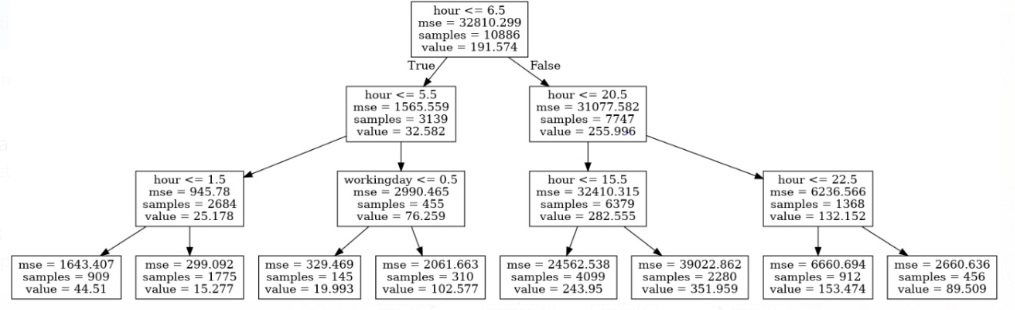



In [ ]:
print(' en ambos casos las divisiones fueron muy parecidas no tomando en cuenta los decimales que al algolitmo entrenado ')